In [100]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
library(patchwork)

Finding the Influence of Maximum Heart Rate and ST Depression on Heart Disease

Introduction
The topic that we will be investigating is heart disease. The term “heart disease” refers to several types of heart conditions that affect the structure and the function of the heart, each with different root causes. Our analysis will not discriminate between the different types of heart disease, instead we will focus on the presence of heart diseases in general in correlation to attributes including maximum heart rate and ST depression.

The question we will be trying to answer is: Given an individual’s maximum heart rate and ST depression, do they have heart disease?
The dataset we will be using is from 1988 and contains 76 attributes in databases from patients in Cleveland, Hungary, Switzerland, and Long Beach V. However, all published experiments only use 14 of the attributes. To answer our question, we will be using 4 attributes to predict the presence of heart disease: age, cholesterol levels, and blood pressure. A person’s serum cholesterol (mg/dl) refers to the total amount of cholesterol in their blood. People diagnosed with heart disease (1) have >50% diameter narrowing in any of their major blood vessels, while people not diagnosed with heart disease (0) have <50% diameter narrowing in any of their major blood vessels. Blood pressure is measured as resting blood pressure (mm Hg).

Methods

We first selected only the continuous variables from the heart disease dataset because we chose to use classification, leaving us with the following variables: age, trestbps (blood pressure), chol (cholesterol levels), thalach (maximum heart rate achieved) and oldpeak (ST depression induced by exercise relative to rest). 
We calculated the means in a table and made boxplots of the selected continuous variables to determine which variables appeared to be the greatest predictors of heart disease.
We will create a scatter plot using the two variables (Maximum heart rate and ST Depression) that were determined to be the greatest predictors of heart disease based on our analysis.

Expected outcomes and significance

We expect to find a positive correlation between maximum heart rate and heart disease, with patients with higher maximum heart rates being more likely to have heart disease. We expect to find a positive correlation between ST Depression and heart disease, with patients with higher ST Depression being more likely to have heart disease. We also expect that our results will be high in accuracy because the sample size of our dataset is fairly large (n = 1000).
Finding a positive correlation between maximum heart rate/ST Depression and heart disease could help detect indicators of heart disease early-on so that heart deterioration can be prevented. It can also propel research into the effects of maximum heart rates and ST Depression.
Our findings could lead to the following future questions: 
Could we use maximum heart rate and/or ST Depression to help detect or diagnose heart disease?
What other variables could be tested to influence heart disease?
Is there a different model we could use?


In [86]:
heart_disease <- read_csv("https://raw.githubusercontent.com/maggie63/dsci-100-group-34/main/data/heart.csv") |>
    mutate(target = as_factor(target))
heart_disease

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [98]:
heart_split <- initial_split(heart_disease, prop = 0.75, strata = target)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

In [97]:
summary <- c("age", "trestbps", "chol", "thalach", "oldpeak")
heart_summary <- heart_training |>
    group_by(target) |>
    summarise_at(vars(summary), mean, na.rm = TRUE) |>
    pivot_longer(-target, names_to = "variable", values_to = "mean")
heart_summary

target,variable,mean
<fct>,<chr>,<dbl>
0,age,56.4625668
0,trestbps,134.1363636
0,chol,250.1443850
0,thalach,138.6283422
0,oldpeak,1.5991979
1,age,52.6446701
1,trestbps,128.6015228
1,chol,240.3680203
1,thalach,158.2360406


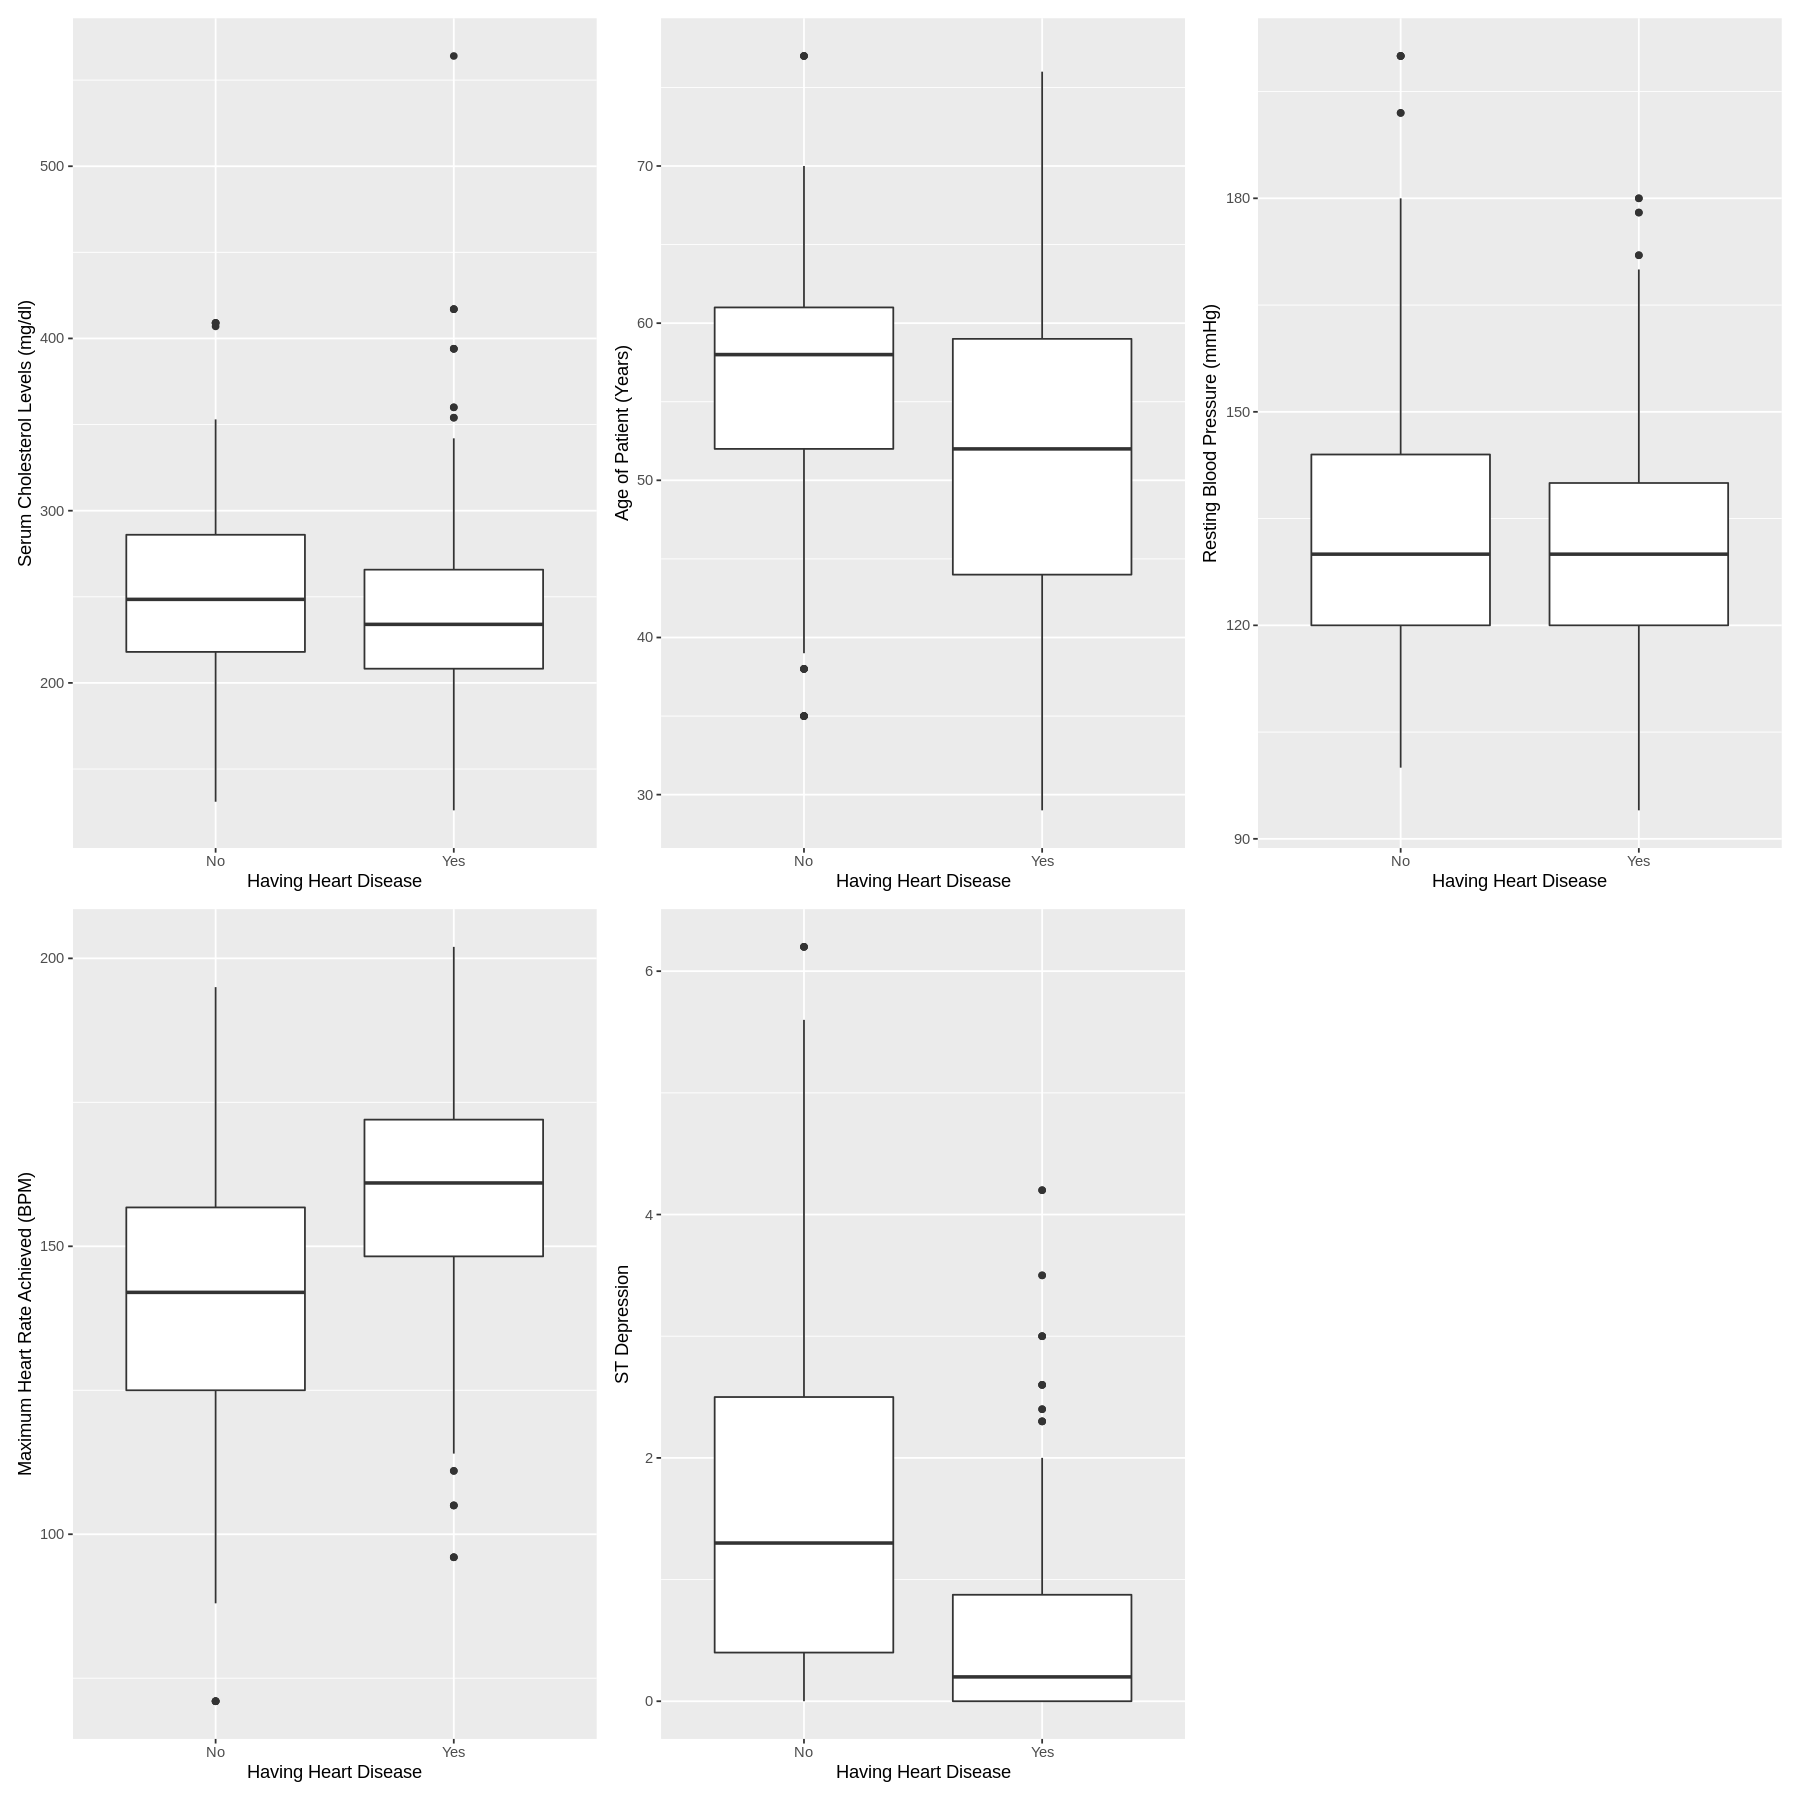

In [102]:
options(repr.plot.width = 15, repr.plot.height = 15) 
heart_plot_chol <- heart_training |>
ggplot(aes(x = as_factor(target), y = chol)) +
geom_boxplot() +
labs(x = "Having Heart Disease", y = "Serum Cholesterol Levels (mg/dl)") +
scale_x_discrete(labels = c("No", "Yes"))

heart_plot_age <- heart_training |>
ggplot(aes(x = as_factor(target), y = age)) +
geom_boxplot() +
labs(x = "Having Heart Disease", y = "Age of Patient (Years)") +
scale_x_discrete(labels = c("No", "Yes"))

heart_plot_bps <- heart_training |>
ggplot(aes(x = as_factor(target), y = trestbps)) +
geom_boxplot() +
labs(x = "Having Heart Disease", y = "Resting Blood Pressure (mmHg)") +
scale_x_discrete(labels = c("No", "Yes"))

heart_plot_max <- heart_training |>
ggplot(aes(x = as_factor(target), y = thalach)) +
geom_boxplot() +
labs(x = "Having Heart Disease", y = "Maximum Heart Rate Achieved (BPM)") +
scale_x_discrete(labels = c("No", "Yes"))

heart_plot_st <- heart_training |>
ggplot(aes(x = as_factor(target), y = oldpeak)) +
geom_boxplot() +
labs(x = "Having Heart Disease", y = "ST Depression") +
scale_x_discrete(labels = c("No", "Yes"))

heart_plot <- heart_plot_chol + heart_plot_age + heart_plot_bps + heart_plot_max + heart_plot_st + plot_layout(ncol = 3)
heart_plot